In [1]:
# libraries that I will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Question 1

1) Create a plot using Matplotlib

- Create a numpy array x with 1000 values ranging from -10 to 10. 
Create another numpy array y with 1000 values ranging from -10 to 10.
- Define a function z_func that takes in two arguments x and y and returns a numpy array of the same shape as x and y. The function should use the equation z = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2). Use x and y as inputs to the z_func function to create a numpy array z.
- Use matplotlib to create a 2D scatter plot of x and y. Use the scatter() function to create the plot, and set the c parameter to z to color the markers based on the value of z. Use the cmap parameter to specify the colormap to use, and set it to 'coolwarm'. Add a colorbar to the plot using the colorbar() function. Set the title of the plot to "Advanced Scatter Plot", and set the x and y axis labels to "X-axis" and "Y-axis", respectively.
- Save the plot as a PNG image named "advanced_scatter_plot.png" with a resolution of 300 DPI.


In [2]:
# Create numpy arrays
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

In [3]:
# define function z_func
def z_func(x, y):
    z = np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)
    return z

# Calculate z
z = z_func(x, y)
print(z.shape)

(1000,)


Text(0, 0.5, 'Y-axis')

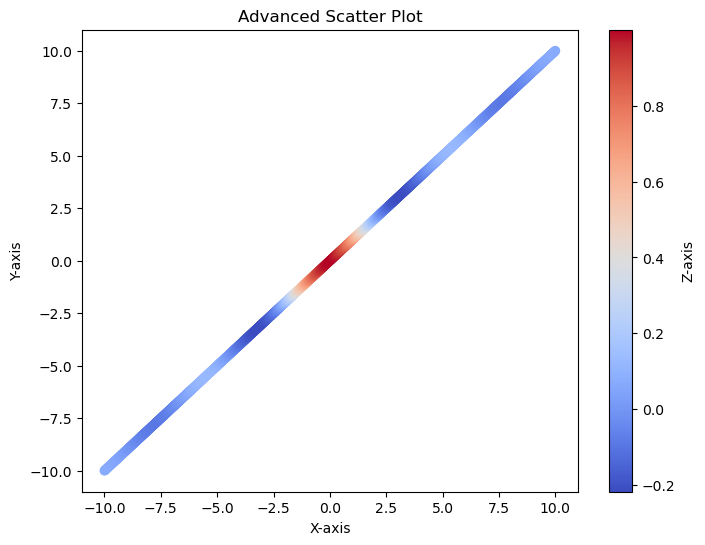

In [4]:
#  2d scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=z, cmap='coolwarm')
plt.colorbar(scatter, label='Z-axis')
plt.title('Advanced Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [5]:
# saving the plot
plt.savefig('advanced_scatter_plot.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

# Question 2

We take data visualisation seriously.  With every single one, we as data scientists, try our best to visualise the numbers accurately and in a way that best supports our goals. But sometimes we get it wrong. We can do better in future if we learn from our mistakes . Now, take a look at the two visualisations below about public opinion on Britain's decision to leave the EU. The one on the left represents a not-so-good visualisation while the right one does a better job.<br>
![Image Title](visualisationimage.png) <br>
Now your task is the following: 

1) First, explain thoroughly which one you think is better; the left or the right. And why!  

2) Reproduce both of them using Matplotlib. Do your best making them the exact copies.  

3) Submit your visualisations including the explanation in step 1 as Jupyter notebook, and also upload it to GitHub!

The dataset: brexit.csv  Download (https://amsterdamtech.instructure.com/courses/326/files/9362?wrap=1)(The data is not completely clean. You need to remove the first couple of rows.)

### Data cleaning

In [6]:
# load dataset and have a preview
df = pd.read_csv('brexit.csv')
df.head()

,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Source: NatCen Social Research,NaN,NaN
1,NaN,NaN,NaN
2,Date,% responding right,% responding wrong
3,02/08/16,46,42
4,09/08/16,45,44


In [7]:
# drop the first three rows as they are an irrelevant part of the dataset then preview again
df = df.drop(df.index[:2])
df.reset_index(drop=True, inplace=True)
df.head()

,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Date,% responding right,% responding wrong
1,02/08/16,46,42
2,09/08/16,45,44
3,17/08/16,46,43
4,23/08/16,45,43


In [8]:
# make the first row to be the column names then drop the first row then reset the index and preview again
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,% responding right,% responding wrong
0,02/08/16,46,42
1,09/08/16,45,44
2,17/08/16,46,43
3,23/08/16,45,43
4,31/08/16,47,44


In [9]:
# look at the data types
df.dtypes

0
Date                  object
% responding right    object
% responding wrong    object
dtype: object

In [10]:
#  change the date column to datetime datatpye
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

0
Date                  datetime64[ns]
% responding right            object
% responding wrong            object
dtype: object

In [11]:
# set the date to index of the dataset
df.set_index('Date', inplace=True)

In [12]:
# preview the index
df.index

DatetimeIndex(['2016-02-08', '2016-09-08', '2016-08-17', '2016-08-23',
               '2016-08-31', '2016-09-14', '2016-12-10', '2016-10-20',
               '2016-11-15', '2016-11-29', '2016-05-12', '2016-12-19',
               '2017-04-01', '2017-10-01', '2017-01-18', '2017-01-31',
               '2017-02-13', '2017-02-22', '2017-02-28', '2017-03-14',
               '2017-03-15', '2017-03-21', '2017-03-27', '2017-06-04',
               '2017-04-13', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-03-05', '2017-10-05', '2017-05-14', '2017-05-17',
               '2017-05-25', '2017-05-31', '2017-07-06', '2017-06-13',
               '2017-06-22', '2017-11-07', '2017-07-19', '2017-01-08',
               '2017-08-22', '2017-08-31', '2017-09-24', '2017-11-10',
               '2017-10-19', '2017-10-20', '2017-10-24', '2017-08-11',
               '2017-05-12', '2017-11-12', '2017-12-20', '2018-08-01',
               '2018-01-17', '2018-01-29', '2018-06-02', '2018-02-13',
      

In [13]:
# sort the dates in ascending order
df = df.sort_index(ascending=True)
df.index

DatetimeIndex(['2016-02-08', '2016-05-12', '2016-08-17', '2016-08-23',
               '2016-08-31', '2016-09-08', '2016-09-14', '2016-10-20',
               '2016-11-15', '2016-11-29', '2016-12-10', '2016-12-19',
               '2017-01-08', '2017-01-18', '2017-01-31', '2017-02-13',
               '2017-02-22', '2017-02-28', '2017-03-05', '2017-03-14',
               '2017-03-15', '2017-03-21', '2017-03-27', '2017-04-01',
               '2017-04-13', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-05-12', '2017-05-14', '2017-05-17', '2017-05-25',
               '2017-05-31', '2017-06-04', '2017-06-13', '2017-06-22',
               '2017-07-06', '2017-07-19', '2017-08-11', '2017-08-22',
               '2017-08-31', '2017-09-24', '2017-10-01', '2017-10-05',
               '2017-10-19', '2017-10-20', '2017-10-24', '2017-11-07',
               '2017-11-10', '2017-11-12', '2017-12-20', '2018-01-05',
               '2018-01-17', '2018-01-29', '2018-02-13', '2018-02-20',
      

In [14]:
df.columns

Index(['% responding right', '% responding wrong'], dtype='object', name=0)

In [15]:
# Change the datatypes of percentages to integer
df['% responding right'] = df['% responding right'].astype(int)
df['% responding wrong'] = df['% responding wrong'].astype(int)

In [16]:
# confirm chANGE
df.dtypes

0
% responding right    int32
% responding wrong    int32
dtype: object

### 1. First, explain thoroughly which one you think is better; the left or the right. And why!  

I think the second plot is better. In the first plot the lines are chunky and too close to each other you can barely view them independently and see the clear relation to each other. We have a rough view of the trend on some parts of the plot but  not all parts since some parts are congested.

The second plot seems better because scatter plot helps explain the trend lines better as we can compare the lines in relation to the data points. Also, the rolling averages used in the trend lines help avoid chunky trend lines since we can not fit a line across the points. For instance in the plots we can see where the lines cross each other clearly, the area where the line touches most points. We can see that not many ponts are included in the trendlines. The percentage responding right seems to be seems to be a dropping average whereas the percentage responding wrong seems to be an increasing average.

### 2. Reproduce both of them using Matplotlib. Do your best making them the exact copies.  

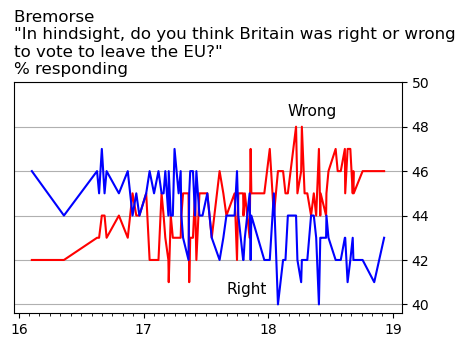

In [49]:
# nOW PLOT
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(df.index, df['% responding wrong'], label = 'Wrong',color='red')
ax.plot(df.index, df['% responding right'], label='Right', color='blue')
# ax.legend()

# Set major ticks for years and minor ticks for scale markers
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Format the major ticks to show only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))


ax.grid(axis='y')
ax.yaxis.tick_right()

# Set y-axis limits
ax.set_ylim(bottom=None, top=50)

ax.text(df.index[-29], 48.5, 'Wrong', fontsize=11)
ax.text(df.index[-45], 40.5, 'Right',  fontsize=11)

plt.title('Bremorse \n"In hindsight, do you think Britain was right or wrong\nto vote to leave the EU?"\n% responding', loc='left')

plt.show()


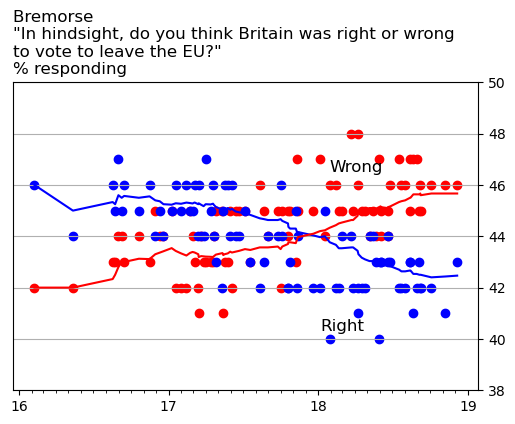

In [48]:
# Plotting scatter plots with trend lines
fig, ax = plt.subplots(figsize=(6, 4))

# Calculate rolling averages that we will use for smooth trend lines
window_size = 30
smoothtrendline_right = df['% responding right'].rolling(window=window_size, min_periods=1).mean() 
smoothtrendline_wrong = df['% responding wrong'].rolling(window=window_size, min_periods=1).mean()


# Scatter plot for "Wrong" responses
ax.scatter(df.index, df['% responding wrong'], color='red')

# Scatter plot for "Right" responses
ax.scatter(df.index, df['% responding right'], color='blue')

# plotting the smooth trendlines
ax.plot(df.index, smoothtrendline_right, color='blue')
ax.plot(df.index, smoothtrendline_wrong, color='red')

# Set major ticks for years and minor ticks for scale markers
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Format the major ticks to show only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))

# Set y-axis limits
ax.set_ylim(bottom=38, top=50)

# Add text on the plot
ax.text(df.index[-32], 46.5, 'Wrong', fontsize=12)
ax.text(df.index[-34], 40.3, 'Right', fontsize=12)

# Set y-axis on the right
ax.yaxis.tick_right()

ax.grid(axis='y')

plt.title('Bremorse \n"In hindsight, do you think Britain was right or wrong\nto vote to leave the EU?"\n% responding', loc='left')
plt.show()
